In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#Excercise1

#Read CSV file
orange_data = pd.read_csv('orange_inc.csv')

#Count missing values
missing_values = {}

for column in orange_data.columns:
  for row in orange_data[column]:
    if row == '-':
      if column in missing_values:
        missing_values[column] += 1
      else:
        missing_values[column] = 1

#Show the answer as a DataFrame
pd.DataFrame(missing_values, index=[0])

,age_bracket,tier,gender,oPhone,oWatch,oPods,oTV,date,card
0,53,28,152,50,40,45,30,17,20


In [ ]:
#Excercise2 - solution 1

#Replace missing value '-' to conventional NaN value
orange_data_nan = orange_data.replace('-', np.nan)

#Delete the rows contain missing values
orange_data_nan = orange_data_nan.dropna()

len(orange_data_nan)

#Excercise2 - solution 2

#Filter for the missing value '-' and then convert using '~' to exclude the rows contain missing values
orange_data_clean = orange_data[~(orange_data == '-').any(axis=1)]

len(orange_data_clean)

19567

In [ ]:
#Excercise 3

#Create column 'product_count'
orange_data_clean['product_count'] = (
    (orange_data_clean.oPhone == '1').astype(int) +
    (orange_data_clean.oWatch == '1').astype(int) +
    (orange_data_clean.oPods == '1').astype(int) +
    (orange_data_clean.oTV == '1').astype(int))

#Filter for customers who own multiple products
orange_data_clean['owns_multiple_products'] = (orange_data_clean['product_count'] >= 2).astype(int)

#Count customers who own multiple products
print(orange_data_clean['owns_multiple_products'].value_counts()[1])

8033


In [ ]:
#Excercise 4

#Filter for female gender
orange_data_group_fe = orange_data_clean[orange_data_clean['gender']=='female']

#Filter for female in 'age_bracket' == '18-25'
group_fe_young = orange_data_group_fe[orange_data_group_fe['age_bracket']=='18-25']

#Filter for Visa_credit card
group_fe_young_visa = group_fe_young[group_fe_young['card']=='Visa_credit']

#Filter for Master_credit card
group_fe_young_master = group_fe_young[group_fe_young['card']=='Mastercard_credit']

#Merge the Master and Visa credit cards
group_fe_merged = pd.concat([group_fe_young_visa, group_fe_young_master])

#Count the number of customers in the group
group_fe_merged.value_counts().sum()

1825

In [ ]:
#Excercise 5

#Filter for Visa_debit card
orange_data_clean['Visa_debit'] = (orange_data_clean['card'] == 'Visa_debit').astype(int).astype(str) # Use .astype(int) and .astype(str) for conversion: True to 1 to '1'

#Filter for Master_debit card
orange_data_clean['Master_debit'] = (orange_data_clean['card'] == 'Mastercard_debit').astype(int).astype(str) # Use .astype(int) and .astype(str) for conversion: True to 1 to '1'

#Filter for other_debit card
orange_data_clean['Other_debit'] = (orange_data_clean['card'] == 'Other_debit').astype(int).astype(str) # Use .astype(int) and .astype(str) for conversion: True to 1 to '1'

#Create dummy count for Debit cards
orange_data_clean['Debit'] = orange_data_clean['Visa_debit'].astype(int) + orange_data_clean['Master_debit'].astype(int) + orange_data_clean['Other_debit'].astype(int)

#Filter out customers older than 25 with debit card and own multiple products
total = orange_data_clean[(orange_data_clean['age_bracket']!='18-25') & (orange_data_clean['owns_multiple_products']==1)].groupby('age_bracket')['Debit'].sum()

#Calculate the pecentage
total.sum()/len(orange_data_clean)*100

13.609648898655898

In [ ]:
#Excercise 6

#Filter for customers who own multiple products
orange_data_6 = orange_data_clean['product_count'] == 4

#Count the number of customers who owns all four products
orange_data_6_count = orange_data_6.astype(int).sum()
orange_data_6_count

89

In [ ]:
#Excercise 7

#Calculate the average number of products each customer tier owns
answer_to_7 = orange_data_clean.groupby('tier')['product_count'].mean()
print(answer_to_7)

tier
gold        1.484461
platinum    1.496120
silver      1.503344
Name: product_count, dtype: float64


In [ ]:
#Excercise 8

#Create the product_prices vector(array)
product_prices = np.array([1200,300,150,2500])

#a)

#Create the column sales_revenue
orange_data_clean['sales_revenue'] = (
        (orange_data_clean.oPhone == '1').astype(int) * product_prices[0] +
        (orange_data_clean.oWatch == '1').astype(int) * product_prices[1] +
        (orange_data_clean.oPods == '1').astype(int) * product_prices[2] +
        (orange_data_clean.oTV == '1').astype(int) * product_prices[3]
)

#Calculate the total revenue
print(orange_data_clean['sales_revenue'].sum())

#b)

#Create the column month_of_purchase
orange_data_clean['month_of_purchase'] = pd.to_datetime(orange_data_clean['date']).dt.month

#Calculate total revenue of each month
best_months = orange_data_clean.groupby('month_of_purchase')['sales_revenue'].sum()

#Filter for the month with highest revenue
best_month = best_months.idxmax()

print(best_month)

#c)

#Calculate the total revenue for each product
phone = orange_data_clean['oPhone'].astype(int).sum() * product_prices[0]
watch = orange_data_clean['oWatch'].astype(int).sum() * product_prices[1]
pods = orange_data_clean['oPods'].astype(int).sum() * product_prices[2]
tv = orange_data_clean['oTV'].astype(int).sum() * product_prices[3]

#Create the revenue table
total_revenue = pd.DataFrame({
    'Product': ['oPhone', 'oWatch', 'oPods', 'oTV'],
    'Sales_Revenue': [phone, watch, pods, tv]
})

#Convert the result to percentage for excercise 9
total_revenue['percentage'] = total_revenue['Sales_Revenue'] / total_revenue['Sales_Revenue'].sum() * 100

print(total_revenue)

24008100
5
  Product  Sales_Revenue  percentage
0  oPhone       14938800   62.223999
1  oWatch        1645500    6.853937
2   oPods        1341300    5.586864
3     oTV        6082500   25.335199


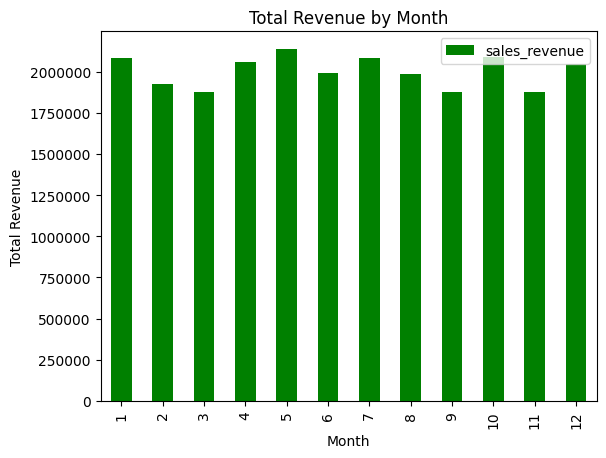

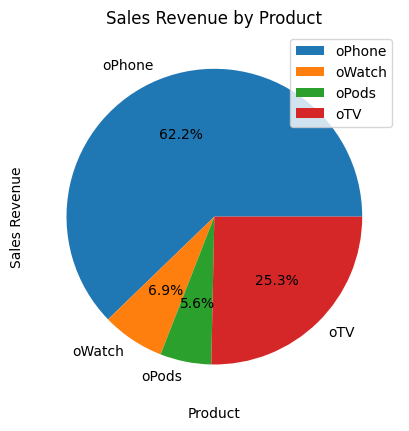

In [ ]:
#Excercise 9

#a)

#Plotting the bar chart
best_months.plot(x='Month',y='Total Revenue',kind='bar',color='green')

#Show legend
plt.legend()

#Show additional info
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Revenue by Month')

plt.show()

#b)

#Plotting the piechart
total_revenue.plot(x='Product',y='percentage',kind='pie',labels=total_revenue['Product'],autopct='%1.1f%%')

#Show additional info
plt.xlabel('Product')
plt.ylabel('Sales Revenue')
plt.title('Sales Revenue by Product')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
#Filter for customers age 18-25 and own 'oPhone'
young_oPhone_owners = orange_data_clean[(orange_data_clean['age_bracket'] == '18-25') & (orange_data_clean['oPhone'] == '1')]

#a)

#Filter for most owned card type among young_oPhone_owners
print(young_oPhone_owners['card'].value_counts().idxmax())

#b)

#Calculate the average number of products purchased by young_oPhone_owners by using product_count
print(young_oPhone_owners.product_count.mean())

Visa_debit
1.692532942898975
